In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# 1. Tải dữ liệu
start = '2010-01-01'
end = datetime.today().strftime('%Y-%m-%d')  # Ngày hiện tại
stock = 'AAPL'
data = yf.download(stock, start, end)

# 2. Xử lý dữ liệu
data.reset_index(inplace=True)
data.dropna(inplace=True)

# 3. Chia tập train & test
data_train = data[['Close']].iloc[:int(len(data)*0.80)]
data_test = data[['Close']].iloc[int(len(data)*0.80):]

scaler = MinMaxScaler(feature_range=(0,1))
data_train_scaled = scaler.fit_transform(data_train)

# 4. Chuẩn bị dữ liệu huấn luyện
x_train, y_train = [], []
for i in range(100, len(data_train_scaled)):
    x_train.append(data_train_scaled[i-100:i])
    y_train.append(data_train_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# 5. Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=80, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1))  



[*********************100%***********************]  1 of 1 completed
/home/phung/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Huấn luyện mô hình
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)




Epoch 1/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - loss: 0.0244
Epoch 2/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 15s 163ms/step - loss: 0.0020
Epoch 3/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 137ms/step - loss: 0.0022
Epoch 4/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - loss: 0.0021
Epoch 5/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - loss: 0.0022


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━

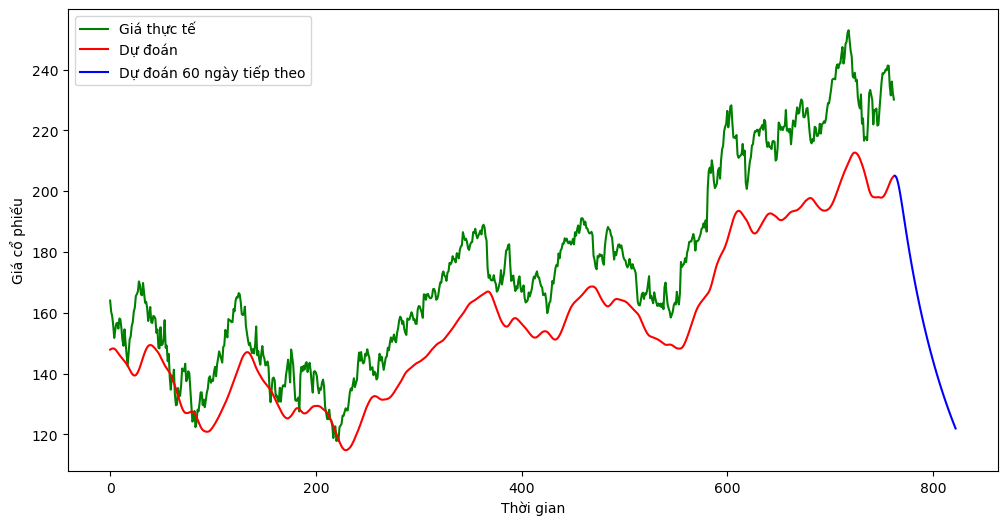

In [9]:
# 7. Chuẩn bị dữ liệu test
past_100_days = data_train.tail(100)
data_test = pd.concat([past_100_days, data_test], ignore_index=True)

data_test_scaled = scaler.transform(data_test)

x_test, y_test = [], []
for i in range(100, len(data_test_scaled)):
    x_test.append(data_test_scaled[i-100:i])
    y_test.append(data_test_scaled[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

# 8. Dự đoán giá cổ phiếu
y_pred = model.predict(x_test)

# 9. Phục hồi giá trị thực
scale_factor = 1 / scaler.scale_[0]
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

# 🔹 **Loại bỏ noise (Không cộng thêm Gaussian Noise)**
# noise = np.random.normal(0, 1, y_pred.shape) 
# y_pred_noisy = y_pred + noise
y_pred_noisy = y_pred  # Giữ nguyên kết quả dự đoán

# 10. Dự đoán 180 ngày tiếp theo
future_days = 60  # Số ngày muốn dự đoán
future_dates = [data['Date'].iloc[-1] + timedelta(days=i) for i in range(1, future_days + 1)]
future_inputs = data_test_scaled[-100:]  # Lấy 100 ngày gần nhất làm input

predicted_future = []
for _ in range(future_days):
    future_input = np.array([future_inputs])
    future_price = model.predict(future_input)[0][0]  # Dự đoán giá tiếp theo
    predicted_future.append(future_price)
    
    # Cập nhật dữ liệu input để dự đoán tiếp
    future_inputs = np.vstack([future_inputs[1:], [future_price]])

# Chuyển đổi giá trị dự đoán về dạng gốc
predicted_future = np.array(predicted_future) * scale_factor

# 11. Vẽ biểu đồ
plt.figure(figsize=(12,6))
plt.plot(y_test, 'g', label='Giá thực tế')
plt.plot(y_pred_noisy, 'r', label='Dự đoán')
plt.plot(range(len(y_test), len(y_test) + future_days), predicted_future, 'b', label=f'Dự đoán {future_days} ngày tiếp theo')
plt.xlabel('Thời gian')
plt.ylabel('Giá cổ phiếu')
plt.legend()
plt.show()